# Исследовательский анализ рынка общественного питания Москвы

- Автор: Савич Ксения
- Дата: 03.05

### Цели и задачи проекта
- исследование рынка общественного питания в Москве
- анализ рейтинга и категории топ 15-ти сетей Москвы по популярности
- получение рекомендаций, полезных в принятии решения по открытию новой точки общественного питания

### Описание данных
Данные состоят из двух датасетов:<br>
- Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания
- Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания <br>
<br>
<br>

`/datasets/rest_info.csv`:<br>

- `name` — название заведения;<br>
- `address` — адрес заведения;<br>
- `district` — административный район, в котором находится заведение, например Центральный административный округ;<br>
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;<br>
- `hours` — информация о днях и часах работы;<br>
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);<br>
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):<br>
0 — заведение не является сетевым;<br>
1 — заведение является сетевым.<br>
- `seats` — количество посадочных мест.<br>
<br>
<br>

`/datasets/rest_price.csv`:<br>

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;<br>
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;<br>
«Цена чашки капучино: 130–220 ₽»;<br>
«Цена бокала пива: 400–600 ₽».<br>
и так далее;<br>
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:<br>
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.<br>
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.<br>
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.<br>
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:<br>
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.<br>
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.<br>
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта
1. Загрузка данных и знакомство с ними
2. Предобработка данных(работа с типами данных, пропусками и дубликатами)
3. Исследовательский анализ данных(изучение основных метрик, корреляции между ними, визуализация данных)
4. Итоговый вывод и рекомендации

##  Загрузка данных и знакомство с ними

- Выгрузим данные датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv` и необходимые для работы библиотеки. Знакомимся с данными при помощи методов `info()`, `head()`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


In [2]:
# Выгружаем данные и создаем для них переменные inf_df и pr_df
inf_df = pd.read_csv('/datasets/rest_info.csv')
pr_df = pd.read_csv('/datasets/rest_price.csv')

In [3]:
# Выведем информацию методом info()
inf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


- датасет с информацией содержит 8406 строк и 9 столбцов
- столбцы содержат данные типов `object`, `float64`, `int64`
- в столбцах `hours` и `seats` есть пропуски, в столбце `seats` их много - около 60%, в работе с пропусками подсчитаем их точную долю и выявим их природу
- столбец `seats` необходимо привести к типу данных `int64`, так как число мест не может быть дробным и носит целочисленный характер; столбец `chain` можно привести к типу `int8`, чтобы уменьшить объем данных, так как это бинарный признак и данные выражаются в виде одного числа(0 или 1); столбец `category` логично привести к типу `category`; остальные типы данных подобраны корректно
- данные приведены к языку snake case 

In [4]:
# Выводим первые пять строк методом head()
inf_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [5]:
# Выведем информацию методом info()
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


- датасет с ценами содержит 4058 строк и 5 столбцов
- типы данных в столбцах `object` и `float64`
- данные во всех столбцах кроме id имеют пропуски
- типы данных приведены верно, но удобнее будет привести столбец `price` к типу `category`
- данные приведены к языку snake case

In [6]:
# Выводим первые пять строк методом head()
pr_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [7]:
# Объединим датасеты в один для более удобной работы и проверим вид нового датасета при помощи head() и info()
df = inf_df.merge(pr_df, on = 'id', how = 'left')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Мы объединили датафреймы в один при помощи левой связи, чтобы не потерять данные с пропусками. Соединение прошло корректно.

##  Предобработка данных

 Приведение данных к подходящему типу, работа с пропусками и дубликатами.

### Приведение данных к нужному типу.

In [8]:
# Приведем столбец seats к типу данных int64
# В столбце есть пропуски, чтобы они не мешали в изменении типа данных используем `errors='coerce'`
df['seats'] = pd.to_numeric(df['seats'], errors='coerce').astype('Int64')

In [9]:
# Столбец chain приводим к int8, но необходимо убедиться, что в нем нет аномальных значений
mn = df['chain'].min()
mx = df['chain'].max()
print(mn, mx)

0 1


Значения соответствуют заявленым, можно менять тип данных.

In [10]:
df['chain'] = df['chain'].astype('int8')

In [11]:
# Приведем столбец category к типу данных category
df['category'] = df['category'].astype('category')

In [12]:
# Приведем price к category
df['price'] = df['price'].astype('category')

In [13]:
# Проверяем корректность смены типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   Int64   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: Int64(1), category(2), float64(3), int8(1), object(6)
memory usage: 755.8+ KB


Данные успешно приведены к нужному типу.

### Работа с пропусками

In [14]:
# Посчитаем пропуски в абсолютном и относительном значениях
df.isna().sum() # абсолютное значение

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [15]:
df.isna().sum() / df.shape[0]# относительное значение

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

- в столбце `hours` пропусков не так много, как в остальных - 6%
- в столбце `seats` 43% пропусков
- в столбце `avg_bill` 55% пропусков
- в столбце `price` 61% пропусков
- в столбце `middle_avg_bill` 63% пропусков
- в столбце `middle_coffee_cup` 94% пропусков
В перечисленных столбцах очень много пропусков - от 43 до 94%. Разберемся с природой пропусков и обработаем данные от них.

In [16]:
d = df[(df['seats'] == 0)]
print(d)

                                    id                        name  \
84    3793bd736bbb4dd08f734d53bfa57b24            Meat Doner Kebab   
177   3fb68f4204274347b94b5cb397fedce7                      Арамье   
196   bfd0d5a3a91f43e9a43f4a5fe96144f1                Донер-Шашлык   
203   78f050b65d4146ef932b734db72e1e86                  Тандыр № 1   
211   4636272b73bd40c59c156725492f2c05            Неаполитан пицца   
...                                ...                         ...   
8118  deb866a144a04546a16f9ec508a25aa7                        Бико   
8168  54ad4021be444c358be987072f51e7d0            Чайхана УЧ Кудук   
8172  b1f7555a82a34a0fb7c42f0818addd99                  Масса кофе   
8336  595fefac108748ae9d158d93cf376c70  Сочная шаурма в Кузьминках   
8362  6b613565645e4c05a70ddd7d2badd502                      Достор   

             category                                      address  \
84           булочная                    Москва, улица Лескова, 22   
177          булочн

- пропуски в столбце `hours`  похожи на случайные пропуски, их не так много, а понять причину пропусков невозможно - такое количество пропусков в данном столбце не окажет сильного влияни на анализ данных, оставим их как есть
- пропуски в столбце `seats` можно связать с отсутствием посадочных мест, однако в данных есть 136 строк со значением 0 в данном столбце и заменять 43% данных нулями некорректно - придется оставить данные как есть
- пропуски в столбцах с ценовыми значениями тоже невозможно заполнить корректно, так как причина появления данных пропусков под вопросом, а восстановить информацию нет возможности, оставляем их
- можно предположить, что пропуски в столбце `middle_coffee_cup` характерны для заведений, которые не являются кофейней 

### Работа с дубликатами

In [17]:
# Проверяем уникальные значения в столбцах
for column in ['category', 'district', 'chain']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())

Уникальные значения в столбце category:
['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']
Categories (8, object): ['бар,паб', 'булочная', 'быстрое питание', 'кафе', 'кофейня', 'пиццерия', 'ресторан', 'столовая']
Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']
Уникальные значения в столбце chain:
[0 1]


In [18]:
# Проверяем наличие дубликатов в столбце id
df.duplicated(subset='id').sum()

0

In [19]:
import difflib

# Функция для поиска неявных дубликатов
def find_duplicates_difflib(df, column, threshold=0.95):
    duplicates = []
    names = df[column].tolist()
    
    for name in names:
        matches = difflib.get_close_matches(name, names, n=len(names), cutoff=threshold)
        for match in matches:
            if match != name:
                score = difflib.SequenceMatcher(None, name, match).ratio() * 100
                duplicates.append((name, match, score))

    return duplicates

# Поиск неявных дубликатов
duplicates = find_duplicates_difflib(df, 'name', threshold=0.95)

# Вывод результатов
for original, match, score in duplicates:
    print(f"'{original}' и '{match}' - схожесть: {score:.2f}%")


'В парке вкуснее' и 'В парке вкуснее!' - схожесть: 96.77%
'9 Bar Coffee' и '9 Bar Coffe' - схожесть: 95.65%
'Хинкали Gали!' и 'Хинкали Gали' - схожесть: 96.00%
'Хинкали-Gали!' и 'Хинкали-Gали' - схожесть: 96.00%
'Хинкали-Gали!' и 'Хинкали-Gали' - схожесть: 96.00%
'Алло! Пицца' и 'Алло Пицца' - схожесть: 95.24%
'Глобус ресторан' и 'Глобус, ресторан' - схожесть: 96.77%
'Доминос пицца' и 'Домино'с пицца' - схожесть: 96.30%
'Центр Плов' и 'Центр Плова' - схожесть: 95.24%
'Хинкали-Gали!' и 'Хинкали-Gали' - схожесть: 96.00%
'Чайхона № 1' и 'Чайхона №1' - схожесть: 95.24%
'Чайхона № 1' и 'Чайхона №1' - схожесть: 95.24%
'Чайхона № 1' и 'Чайхона №1' - схожесть: 95.24%
'Чайхона № 1' и 'Чайхона №1' - схожесть: 95.24%
'Чайхона № 1' и 'Чайхона №1' - схожесть: 95.24%
'Чайхана Халал' и 'Чайхана Халаль' - схожесть: 96.30%
'Чайхана Халал' и 'Чайхана Халаль' - схожесть: 96.30%
'Чайхана Халаль' и 'Чайхана Халал' - схожесть: 96.30%
'Алло! Пицца' и 'Алло Пицца' - схожесть: 95.24%
'Чайхана Райан' и 'Чайхана

По уникальным значениям дубликаты не найдены, в столбцах, которые это предполагают, уникальные значения. Все id уникальны. Однако есть опечатки в названиях, которые необходимо будет исправить. В дальнейшем, проводя обработку от дубликатов, создадим копию датафрейма, для того, чтобы мы могли проанализировать разницу между очищенным и изначальным датафреймом.

In [20]:
# создаем копию датафрейма
df_l = df.copy()

In [21]:
# Замена наименований в столбцах
df_l['name'] = df_l['name'].replace('В парке вкуснее!', 'В парке вкуснее')
df_l['name'] = df_l['name'].replace('9 Bar Coffe', '9 Bar Coffee')
df_l['name'] = df_l['name'].replace('Хинкали Gали!', 'Хинкали Gали')
df_l['name'] = df_l['name'].replace('Алло Пицца', 'Алло! Пицца')
df_l['name'] = df_l['name'].replace('Глобус, ресторан', 'Глобус ресторан')
df_l['name'] = df_l['name'].replace('Доминос пицца', 'Домино\'с пицца')
df_l['name'] = df_l['name'].replace('Центр Плова', 'Центр Плов')
df_l['name'] = df_l['name'].replace('Чайхона № 1', 'Чайхона №1')
df_l['name'] = df_l['name'].replace('Чайхана Халал', 'Чайхана Халаль')
df_l['name'] = df_l['name'].replace('Jeffrey’s Coffeeshop', 'Jeffrey\'s Coffeeshop')
df_l['name'] = df_l['name'].replace('Раковарня Клешни и хвосты', 'Раковарня Клешни и Хвосты')
df_l['name'] = df_l['name'].replace('Хлеб Насущный экспресс', 'Хлеб Насущный Экспресс')
df_l['name'] = df_l['name'].replace('Есть Хинкали&Пить Вино', 'Есть Хинкали & Пить Вино')
df_l['name'] = df_l['name'].replace('Corner cafe & kitchen', 'Corner cafe&kitchen')
df_l['name'] = df_l['name'].replace('PiNzeria by Bontempi', 'Pinzeria by Bontempi')
df_l['name'] = df_l['name'].replace('Хинкали-Gали!', 'Хинкали Gали')
df_l['name'] = df_l['name'].replace('Хинкали-Gали', 'Хинкали Gали')

In [22]:
# Проверим замену тем же кодом
import difflib

# Функция для поиска неявных дубликатов
def find_duplicates_difflib(df_l, column, threshold=0.95):
    duplicates = []
    names = df_l[column].tolist()
    
    for name in names:
        matches = difflib.get_close_matches(name, names, n=len(names), cutoff=threshold)
        for match in matches:
            if match != name:
                score = difflib.SequenceMatcher(None, name, match).ratio() * 100
                duplicates.append((name, match, score))

    return duplicates

# Поиск неявных дубликатов
duplicates = find_duplicates_difflib(df_l, 'name', threshold=0.95)

# Вывод результатов
for original, match, score in duplicates:
    print(f"'{original}' и '{match}' - схожесть: {score:.2f}%")

'Чайхана Райан' и 'Чайхана Райхан' - схожесть: 96.30%
'Кафетериус № 6' и 'Кафетериус № 26' - схожесть: 96.55%
'Кафетериус № 26' и 'Кафетериус № 6' - схожесть: 96.55%
'Чайхана Райхан' и 'Чайхана Райан' - схожесть: 96.30%


Мы исправили ошибки в названиях. Исправляя названия, я проверяла реальное написание названий данных точек. Чайхана Райан и Чайхана Райхан обе существуют, также как и Кафетериусы 6 и 26. Теперь немного снизим порог схожести и попробуем найти еще дубликаты.

In [23]:
import difflib
import pandas as pd

# Функция для поиска неявных дубликатов
def find_duplicates_difflib(df_l, column, threshold=0.93):
    duplicates = set()  # Используем множество для уникальных дубликатов
    names = df_l[column].tolist()
    
    for name in names:
        matches = difflib.get_close_matches(name, names, n=len(names), cutoff=threshold)
        for match in matches:
            if match != name:
                score = difflib.SequenceMatcher(None, name, match).ratio() * 100
                # Добавляем только уникальные пары (в порядке оригинала и совпадения)
                duplicates.add((min(name, match), max(name, match), score))

    return list(duplicates)  # Преобразуем множество обратно в список

# Поиск неявных дубликатов
duplicates = find_duplicates_difflib(df_l, 'name', threshold=0.93)

# Вывод результатов
for original, match, score in duplicates:
    print(f"'{original}' и '{match}' - схожесть: {score:.2f}%")


'Шашлычный двор № 1' и 'Шашлычный дворик № 1' - схожесть: 94.74%
'Чайхана-24' и 'Чайхана24' - схожесть: 94.74%
'Здоровое Питание' и 'Здоровое питание' - схожесть: 93.75%
'Крошка Картошка' и 'Крошка картошка' - схожесть: 93.33%
'Восточный двор' и 'Восточный дворик' - схожесть: 93.33%
'Main Food' и 'MainFood' - схожесть: 94.12%
'Подсолнух' и 'Подсолнухи' - схожесть: 94.74%
'Чайхана 24' и 'Чайхана24' - схожесть: 94.74%
'Carrots and Beans' и 'Carrots and beans' - схожесть: 94.12%
'I Coffee' и 'IQ Coffee' - схожесть: 94.12%
'Хлеб да Выпечка' и 'Хлеб да выпечка' - схожесть: 93.33%
'Франклинс Бургер' и 'Франклинс бургер' - схожесть: 93.75%
'Донер 24' и 'Донер24' - схожесть: 93.33%
'Церковная трапеза' и 'Церковная трапезная' - схожесть: 94.44%
'Лепим и Варим Пельменная на рынке' и 'Лепим и Варим Пельменная на рынке № 2' - схожесть: 94.29%
'Кафетериус № 26' и 'Кафетериус № 6' - схожесть: 96.55%
'Кафе 35' и 'Кафе 365' - схожесть: 93.33%
'Чайхана Райан' и 'Чайхана Райхан' - схожесть: 96.30%
'Семе

В данных много опечаток, которые связаны с ошибкой в регистре. Напишем все нызвания в нижнем регистре, чтобы убрать дубликаты.

In [24]:
# приводим все названия в датафрейме к нижнему регистру
df_l = df_l.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [25]:
import difflib
import pandas as pd

# Функция для поиска неявных дубликатов
def find_duplicates_difflib(df_l, column, threshold=0.93):
    duplicates = set()  # Используем множество для уникальных дубликатов
    names = df_l[column].tolist()
    
    for name in names:
        matches = difflib.get_close_matches(name, names, n=len(names), cutoff=threshold)
        for match in matches:
            if match != name:
                score = difflib.SequenceMatcher(None, name, match).ratio() * 100
                # Добавляем только уникальные пары (в порядке оригинала и совпадения)
                duplicates.add((min(name, match), max(name, match), score))

    return list(duplicates)  # Преобразуем множество обратно в список

# Поиск неявных дубликатов
duplicates = find_duplicates_difflib(df_l, 'name', threshold=0.93)

# Вывод результатов
for original, match, score in duplicates:
    print(f"'{original}' и '{match}' - схожесть: {score:.2f}%")

'вкусняша' и 'вкусняшка' - схожесть: 94.12%
'чайхана бишкек сити' и 'чайхона бишкек сити' - схожесть: 94.74%
'хинкали' и 'хинкали+' - схожесть: 93.33%
'хинкали хачапури' и 'хинкали. хачапури' - схожесть: 96.97%
'la cafe' и 'lav cafe' - схожесть: 93.33%
'meat лав' и 'meatлав' - схожесть: 93.33%
'шашлычный двор' и 'шашлычный дворик' - схожесть: 93.33%
'вкинобар' и 'кинобар' - схожесть: 93.33%
'церковная трапеза' и 'церковная трапезная' - схожесть: 94.44%
'чайхана 24' и 'чайхана24' - схожесть: 94.74%
'шашлычный двор № 1' и 'шашлычный дворик № 1' - схожесть: 94.74%
'чайхана райан' и 'чайхана райхан' - схожесть: 96.30%
'eat street' и 'meat street' - схожесть: 95.24%
'хинкали & хачапури' и 'хинкали хачапури' - схожесть: 94.12%
'суши стор' и 'сушистор' - схожесть: 94.12%
'coffee in' и 'coffee inn' - схожесть: 94.74%
'гастрорюмочная шесть you шесть' и 'гастрорюмочная шесть-you-шесть' - схожесть: 93.33%
'шаурма 24' и 'шаурма24' - схожесть: 94.12%
'восточный двор' и 'восточный дворик' - схожесть

In [26]:
df_l['name'] = df_l['name'].replace('кофе порт', 'кофе-порт')
df_l['name'] = df_l['name'].replace('кофепорт', 'кофе-порт')
df_l['name'] = df_l['name'].replace('сушисет', 'суши сет')
df_l['name'] = df_l['name'].replace('вкинобар', 'кинобар')
df_l['name'] = df_l['name'].replace('coffee inn', 'coffee in')
df_l['name'] = df_l['name'].replace('main food', 'mainfood')
df_l['name'] = df_l['name'].replace('кафе, пекарня', 'кафе пекарня')
df_l['name'] = df_l['name'].replace('shakeup', 'shake up')
df_l['name'] = df_l['name'].replace('eat street', 'meat street')
df_l['name'] = df_l['name'].replace('чайхана ош сити', 'чайхона ош сити')
df_l['name'] = df_l['name'].replace('сушистор', 'суши стор')
df_l['name'] = df_l['name'].replace('it\'s сот - кофейня', 'it\'s сот-кофейня')
df_l['name'] = df_l['name'].replace('кафе-кондитерская', 'кафе кондитерская')
df_l['name'] = df_l['name'].replace('ситипицца', 'сити пицца')
df_l['name'] = df_l['name'].replace('багратиони', 'багратион')
df_l['name'] = df_l['name'].replace('чебуреки манты', 'чебуреки и манты')
df_l['name'] = df_l['name'].replace('кружкапаб', 'кружка паб')
df_l['name'] = df_l['name'].replace('кочевники', 'кочевник')
df_l['name'] = df_l['name'].replace('хинкали и хачапури', 'хинкали & хачапури')
df_l['name'] = df_l['name'].replace('намангале', 'на мангале')
df_l['name'] = df_l['name'].replace('чайхана халаль24', 'чайхана халаль 24')
df_l['name'] = df_l['name'].replace('чайхана бишкек сити', 'чайхона бишкек сити')
df_l['name'] = df_l['name'].replace('lav cafe', 'la cafe')
df_l['name'] = df_l['name'].replace('coffee bay', 'coffee way')
df_l['name'] = df_l['name'].replace('омореморе', 'мореморе')
df_l['name'] = df_l['name'].replace('буфет', 'буффет')
df_l['name'] = df_l['name'].replace('cofefest', 'cofe fest')
df_l['name'] = df_l['name'].replace('чайхона востока', 'чайхона востока 24')
df_l['name'] = df_l['name'].replace('cafe13', 'cafe 13')
df_l['name'] = df_l['name'].replace('шаурма24', 'шаурма 24')
df_l['name'] = df_l['name'].replace('донер тандыр', 'донер-тандыр')
df_l['name'] = df_l['name'].replace('чайхана Зилола 2', 'чайхана Зилола')
df_l['name'] = df_l['name'].replace('meatлав', 'meat лав')
df_l['name'] = df_l['name'].replace('хинкали хачапури', 'хинкали & хачапури')
df_l['name'] = df_l['name'].replace('донер кебаб', 'донер-кебаб')
df_l['name'] = df_l['name'].replace('подсолнухи', 'подсолнух')
df_l['name'] = df_l['name'].replace('кебабс', 'кебаб')
df_l['name'] = df_l['name'].replace('фо бо и том ям', 'фо бо & том ям')
df_l['name'] = df_l['name'].replace('кафе 35', 'кафе 365')
df_l['name'] = df_l['name'].replace('local', 'locals')
df_l['name'] = df_l['name'].replace('канти', 'кантим')
df_l['name'] = df_l['name'].replace('донер24', 'донер 24')
df_l['name'] = df_l['name'].replace('самарканд', 'я самарканд')
df_l['name'] = df_l['name'].replace('чайхана24', 'чайхана 24')
df_l['name'] = df_l['name'].replace('чайхана-24', 'чайхана 24')
df_l['name'] = df_l['name'].replace('церковная трапеза', 'церковная трапезная')
df_l['name'] = df_l['name'].replace('вкусное', 'вкусно')
df_l['name'] = df_l['name'].replace('чайхона халва', 'чайхана халва')
df_l['name'] = df_l['name'].replace('донер-хаус', 'донер хаус')
df_l['name'] = df_l['name'].replace('чайхона 24', 'чайхана 24')
df_l['name'] = df_l['name'].replace('кофе&moloko', 'кофе & moloko')
df_l['name'] = df_l['name'].replace('чайхана халаль', 'чайхана халаль24')
df_l['name'] = df_l['name'].replace('хинкали хачапури', 'хинкали & хачапури')
df_l['name'] = df_l['name'].replace('трдельникъ', 'трдельник')
df_l['name'] = df_l['name'].replace('кофе, пекарня', 'кафе, пекарня')
df_l['name'] = df_l['name'].replace('яндекс лавка', 'яндекс.лавка')
df_l['name'] = df_l['name'].replace('кафе столовая', 'кафе-столовая')
df_l['name'] = df_l['name'].replace('бистро 2', 'бистро 24')
df_l['name'] = df_l['name'].replace('сладкое', 'сладко')
df_l['name'] = df_l['name'].replace('bufet', 'buffet')
df_l['name'] = df_l['name'].replace('сезоны', 'сезон')
df_l['name'] = df_l['name'].replace('дом 8а', 'дом 8')
df_l['name'] = df_l['name'].replace('хинкали. хачапури', 'хинкали хачапури')
df_l['name'] = df_l['name'].replace('столовая - буфетъ', 'столовая-буфет')
df_l['name'] = df_l['name'].replace('аль бухари', 'аль-бухари')
df_l['name'] = df_l['name'].replace('батон', 'батони')
df_l['name'] = df_l['name'].replace('бистрот', 'бистро')
df_l['name'] = df_l['name'].replace('онегинъ', 'онегин')
df_l['name'] = df_l['name'].replace('гастрорюмочная шесть-you-шесть', 'гастрорюмочная шесть you шесть')
df_l['name'] = df_l['name'].replace('донер-хаус', 'донер хаус')
df_l['name'] = df_l['name'].replace('стардог', 'стардогс')
df_l['name'] = df_l['name'].replace('перекресток', 'перекрёсток')
df_l['name'] = df_l['name'].replace('festa & тесто', 'festa&тесто')
df_l['name'] = df_l['name'].replace('red cafe', 'rd cafe')
df_l['name'] = df_l['name'].replace('чайхана-24', 'чайхана24')

In [27]:
import difflib
import pandas as pd

# Функция для поиска неявных дубликатов
def find_duplicates_difflib(df_l, column, threshold=0.93):
    duplicates = set()  # Используем множество для уникальных дубликатов
    names = df_l[column].tolist()
    
    for name in names:
        matches = difflib.get_close_matches(name, names, n=len(names), cutoff=threshold)
        for match in matches:
            if match != name:
                score = difflib.SequenceMatcher(None, name, match).ratio() * 100
                # Добавляем только уникальные пары (в порядке оригинала и совпадения)
                duplicates.add((min(name, match), max(name, match), score))

    return list(duplicates)  # Преобразуем множество обратно в список

# Поиск неявных дубликатов
duplicates = find_duplicates_difflib(df_l, 'name', threshold=0.93)

# Вывод результатов
for original, match, score in duplicates:
    print(f"'{original}' и '{match}' - схожесть: {score:.2f}%")

'чайхана халаль 24' и 'чайхана халаль24' - схожесть: 96.97%
'вкусняша' и 'вкусняшка' - схожесть: 94.12%
'хачапури' и 'хачапурия' - схожесть: 94.12%
'лепим и варим пельменная на рынке' и 'лепим и варим пельменная на рынке № 2' - схожесть: 94.29%
'шашлычный двор № 1' и 'шашлычный дворик № 1' - схожесть: 94.74%
'хинкали' и 'хинкали+' - схожесть: 93.33%
'центр плов' и 'центр плова' - схожесть: 95.24%
'восточный двор' и 'восточный дворик' - схожесть: 93.33%
'кафетериус № 26' и 'кафетериус № 6' - схожесть: 96.55%
'шашлычный двор' и 'шашлычный дворик' - схожесть: 93.33%
'кафе пекарня' и 'кафе, пекарня' - схожесть: 96.00%
'чайхана зилола' и 'чайхана зилола 2' - схожесть: 93.33%
'чайхана райан' и 'чайхана райхан' - схожесть: 96.30%
'i coffee' и 'iq coffee' - схожесть: 94.12%
'хинкали & хачапури' и 'хинкали хачапури' - схожесть: 94.12%


Мы исправили опечатки. Те названия, что остались, могут действительно встречаться, поэтому мы их не трогаем.

In [28]:
df.duplicated().sum()

0

Явных дубликатов нет. Неявные устранены. Создадим новый столбец `is_24_7`, который будет отражать, круглосуточные и работают ли ежедневно заведения или нет.

In [29]:
df_l['is_24_7'] = df_l['hours'] == 'ежедневно, круглосуточно'

In [30]:
df_l.reset_index(drop=True, inplace=True)

In [31]:
df_l.info()
df_l.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   object 
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8406 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 862.1+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",юго-западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",3.9,0,150,NaN,средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",юго-восточный административный округ,"ежедневно, круглосуточно",4.2,1,150,NaN,NaN,NaN,NaN,True
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,kebab time,кафе,"москва, россошанский проезд, 6",южный административный округ,"ежедневно, круглосуточно",3.9,0,12,NaN,NaN,NaN,NaN,True


In [32]:
# Подсчет количества данных
df_len = len(df)
df_l_len = len(df_l)

# Вычисление количества удаленных строк
len_dr = df_len - df_l_len

# Вычисление процента удаленных данных
len_cl = (len_dr / df_len) * 100
print(len_cl)

0.0


In [33]:
df.info()
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   Int64   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
dtypes: Int64(1), category(2), float64(3), int8(1), object(6)
memory usage: 755.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 840

Заметим, что в `df_l`, с которым мы работаем, неверные типы данных. Исправим их

In [34]:
df_l['seats'] = pd.to_numeric(df_l['seats'], errors='coerce').astype('Int64')
df_l['chain'] = df_l['chain'].astype('int8')
df_l['category'] = df_l['category'].astype('category')
df_l['price'] = df_l['price'].astype('category')

In [35]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8406 non-null   object  
 1   name               8406 non-null   object  
 2   category           8406 non-null   category
 3   address            8406 non-null   object  
 4   district           8406 non-null   object  
 5   hours              7870 non-null   object  
 6   rating             8406 non-null   float64 
 7   chain              8406 non-null   int8    
 8   seats              4795 non-null   Int64   
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float64 
 12  middle_coffee_cup  535 non-null    float64 
 13  is_24_7            8406 non-null   bool    
dtypes: Int64(1), bool(1), category(2), float64(3), int8(1), object(6)
memory usage: 698.4+ KB


---

### Промежуточный вывод


В данных были неявные дубликаты, связанные с опечатками - они были успешно заменены. Пропуски есть и в достаточно большом количестве, однако безопасно заменить или удалить их невозможно. <br>
Был создан новый столбец `is_24_7`, показывающий круглосуточные и работают ли ежедневно заведения или нет. <br>
В процессе предобработки данных количество строк осталось те(в нашем случае это работа с дубликатами).

## 3. Исследовательский анализ данных

Проведение исследовательского анализа данных при помощи визулизаций. Оценка показателей заведений в разрезе категорий и т д. 

---

### Задача 1

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории.

In [36]:
# Проверим, какие категории заведений представлены в данных
df_l['category'].unique()

['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']
Categories (8, object): ['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб', 'быстрое питание', 'булочная', 'столовая']

In [37]:
# Посмотрим на числовые значения заведений в каждой категории
df_l.groupby('category')['id'].nunique()

category
бар,паб             765
булочная            256
быстрое питание     603
кафе               2378
кофейня            1413
пиццерия            633
ресторан           2043
столовая            315
Name: id, dtype: int64

Рапределение неравномерное, большая часть заведений - кафе, рестораны или кофейни. Построим визуализацию, чтобы визуально оценить распределние.

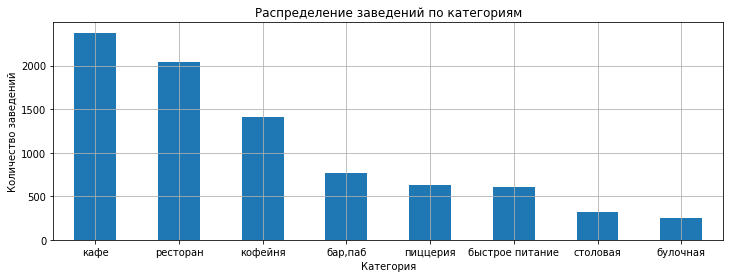

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_l['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений по категориям'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Наши наблюдения подтвердились, меньшую часть от заведений занимают булочные и столовые(менее 500 заведений), а большую кафе, рестораны и кофейни. Кафе и ресторанов более 2000, кофеен чуть меньше 1500.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [39]:
# Виды районов, которые присутствуют в данных
df_l['district'].unique()

array(['северный административный округ',
       'северо-восточный административный округ',
       'северо-западный административный округ',
       'западный административный округ',
       'центральный административный округ',
       'восточный административный округ',
       'юго-восточный административный округ',
       'южный административный округ',
       'юго-западный административный округ'], dtype=object)

In [40]:
# Исследуем численное распределение заведений по административным районам
df_l.groupby('district')['id'].nunique()

district
восточный административный округ            798
западный административный округ             851
северный административный округ             900
северо-восточный административный округ     891
северо-западный административный округ      409
центральный административный округ         2242
юго-восточный административный округ        714
юго-западный административный округ         709
южный административный округ                892
Name: id, dtype: int64

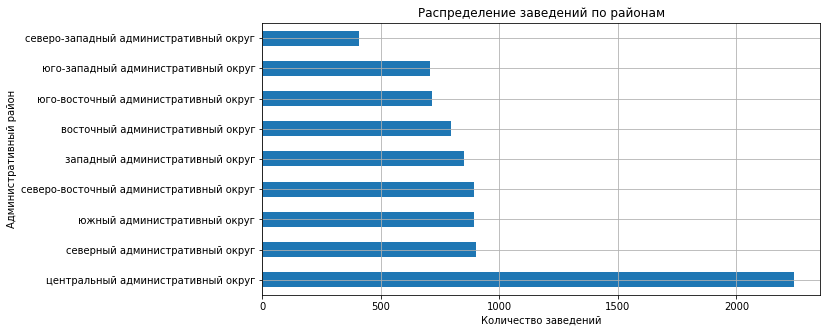

In [41]:
# Визуализация распредления заведений по административным районам
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_l['district'].value_counts().plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений по районам'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В центральном административном округе находится большая часть заведений(более 2000) - количество заведений в данном районе превышает количество в других более чем в два раза(в остальных значения колеблются примерно от 700 до 900). В остальных дистриктах значения распредедлены равномерно. Меньше всего заведений в северо-западном округе(чуть менее 500). 

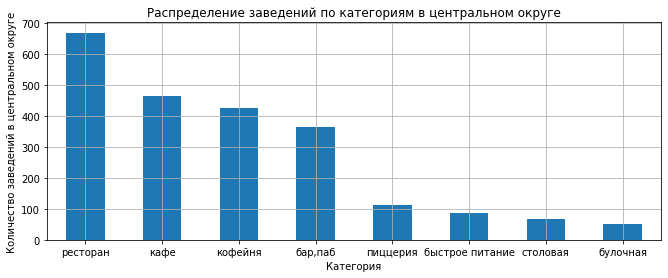

In [42]:
# Визуализация по категориям заведений в центральном округе

# Для начала отфильтруем датафрейм, оставив в нем только данные центрального округа
f_df = df_l[df_l['district'] == 'центральный административный округ']

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(11, 4))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
f_df['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение заведений по категориям в центральном округе'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений в центральном округе')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

В цетральном округе распределение по категория похоже на распредление по всем округам, однако здесь количество кафе(более 450) и кофеен(более 400) превышают рестораны(более 650). Столовых и булочных также меньше всего. 

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

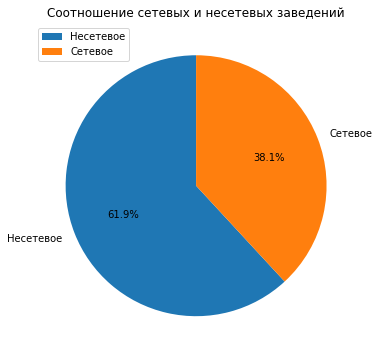

In [43]:
# Визуализация соотношения сетевых и несетевых заведений
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 6))

# Получаем количество сетевых и несетевых заведений
counts = df_l['chain'].value_counts()

# Определяем метки для легенды на основе значений в counts
labels = counts.index.map({1: 'Сетевое', 0: 'Несетевое'})

# Строим круговую диаграмму
counts.plot(
    kind='pie',  # Круговая диаграмма
    autopct='%1.1f%%',  # Формат отображения процентов
    startangle=90,  # Начальный угол для отображения
    labels=labels,  # Добавляем метки для легенды
    legend=True,  # Включаем легенду
    title='Соотношение сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.ylabel('')  # Убираем метку по оси Y
plt.grid(False)  # Отключаем сетку

# Выводим график
plt.show()


Несетевых заведений больше, чем сетевых. Значения составляют 62% и 38% соответственно. Учитывая, что для маленьких сетевых заведений могут встречаться ошибки, можно предположить, что значение сетевых в реальности чуть больше

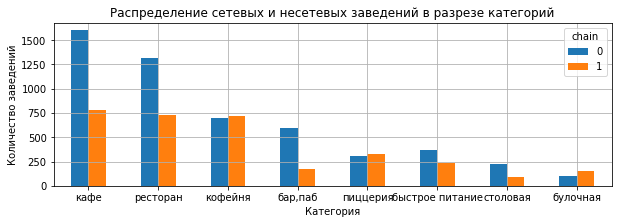

In [44]:
# Изучим распределение сетевых и несетевых заведений в разрезе категорий при помощи стобчатой диаграммы
grouped = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)

# Суммируем значения по каждой категории для сортировки
grouped['total'] = grouped.sum(axis=1)

# Сортируем по общему количеству заведений
grouped = grouped.sort_values(by='total', ascending=False).drop(columns='total')

# Строим столбчатую диаграмму
grouped.plot(kind='bar',
               title='Распределение сетевых и несетевых заведений в разрезе категорий',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=0,
               figsize=(10, 3))

plt.grid()

# Выводим график
plt.show()


В графике выше синий цвет отражает количество несетевых заведений, а оранжевый сетевых. Во всех категориях кроме булочных, кофеен и пиццерий количество несетевых превышает количество сетевых. 

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.


In [45]:
df_l['seats'].min()

0

In [46]:
df_l['seats'].max()

1288

1288 посадочных - сомнительно. Думаю, что это аномальное значение, и скорее всего есть еще аномальные значения. Построим ящик с усами, чтобы увидеть аномальные значения и распределения значений в разрезе категорий. 

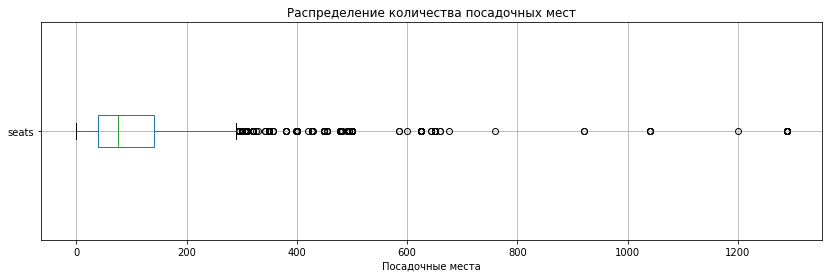

In [47]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 4))

# Строим диаграмму размаха значений в столбце score
df_l.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('Посадочные места')
# Выводим график
plt.show()

Данные имеют достаточно много аномальных отклоненений. Изучив дополнительную информацию в открытых источниках и проанализировав график, я убрала бы из анализа значения выше 350. Так как 350 мест, включая летнюю веранду, иметь в целом возможно. Также количество аномальных значений уменьшается после данного показателя. Возможно в аномальных значениях опечатка. 

In [ ]:
# Построим столбчатую диаграмму, чтобы проанализировать медианный показатель мест для категорий.
# Фильтрация данных
filtered_df = df_l[df_l['seats'] < 350]

# Вычисление медианного значения
median_values = filtered_df.groupby('category')['seats'].median().reset_index()

# Сортировка по медианному количеству посадочных мест
median_values = median_values.sort_values(by='seats', ascending=False)

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 4))

# Построение столбчатой диаграммы
plt.bar(median_values['category'], median_values['seats'])
plt.xlabel('Категория')
plt.ylabel('Медианное количество посадочных мест')
plt.title('Медианное количество посадочных мест по категориям')
plt.grid()

# Поворот меток по оси x для лучшей читаемости
plt.xticks(rotation=45)

# Вывод графика
plt.show()


In [ ]:
# Построим столбчатую диаграмму, чтобы проанализировать средний показатель мест для категорий.


# Вычисление среднего значения
mean_values = filtered_df.groupby('category')['seats'].mean().reset_index()

# Сортировка по среднему значению посадочных мест
mean_values = mean_values.sort_values(by='seats', ascending=False)
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 4))
# Построение столбчатой диаграммы
plt.bar(mean_values['category'], mean_values['seats'])
plt.xlabel('Категория')
plt.ylabel('Среднеее количество посадочных мест')
plt.title('Среднее количество посадочных мест по категориям')
plt.grid()
plt.show()

Выше были построены графики по среднему и по медианному значению посадочных мест по категориям заведений. Средние значения выше медианных из-за более высокого разброса. Будем ориентироваться на медианный показатель. Из-за выбросов в данных среднее не является качественным способом определения типичного количества посадочных мест. <br>
Больше всего посадочных мест приходится на бары, рестораны, кофейни и столовые(70-80). Меньше всего посадочных мест требуется в булочных и пиццериях(~50). 

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [ ]:
# Исследуем средний рейтинг заведений по категориям
# Вычисление среднего значения
mn_values = df_l.groupby('category')['rating'].mean().reset_index()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(14, 4))
# Построение столбчатой диаграммы
plt.bar(mn_values['category'], mn_values['rating'])
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг по категориям')
plt.grid()
plt.show()

Средний рейтинг по всем категориям выше 4, но не доходит до 4,5. Здесь в целом значения по всем категориям приблизительно одинаковые. Самый низкий рейтинг имеет категория быстрого питания, а самый высокий - бары и пабы. 

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построем и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

In [ ]:
from phik import phik_matrix
correlation_matrix = df_l[['district', 'category', 'is_24_7', 'rating',
                              'chain', 'seats', 'price']].phik_matrix()
df_heatmap = correlation_matrix.loc[correlation_matrix.index !='rating'][['rating']].sort_values(by='rating', 
                                                                                                 ascending=False)
sns.heatmap(df_heatmap, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, linewidths=0.5)
plt.xlabel('Рейтинг')
plt.ylabel('Данные')
plt.title('Тепловая карта корреляции между рейтингом и другими данными')
plt.show()

Тепловая карта показывает, что количество мест никак не влияет на райтинг заведения. В целом все перечисленные признаки минимально влияют на рейтинг заведения. Самая высокая корреляция замечена между ценовой категорией и рейтингом. Сделаем визуализацию, чтобы оценить эту связь.

In [ ]:
# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 5))
sns.barplot(data=df_l, x='price', y='rating')

# Настройка заголовка и меток осей
plt.title('Средний рейтинг по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Средний рейтинг')
plt.grid(axis='y')
plt.show()

Корреляция показывает, что чем выше ценовая категория, тем выше рейтинг.

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся?

In [ ]:
# Фильтрация данных по признаку chain
filtrd_df = df_l[df_l['chain'] == 1]
# Извлечение названий сетей из колонки name
filtrd_df['name_s'] = filtrd_df['name'].str.split(' - ').str[0]
# Считаем количество заведений и средний рейтинг для каждой сети
chain_stats = filtrd_df.groupby('name_s').agg(
    number_of_outlets=('name', 'count'),
    average_rating=('rating', 'mean'),
    category_s=('category', 'first')
).reset_index()

# Находим топ-15 популярных сетей по количеству заведений
top_chains = chain_stats.nlargest(15, 'number_of_outlets')

# Выводим результаты
print(top_chains)

In [ ]:
# Создаем цветовую карту для категорий
category_colors = {
    'кафе': 'blue',
    'кофейня': 'green',
    'пиццерия': 'purple',
    'булочная': 'orange',
    'ресторан': 'yellow',
    'быстрое питание': 'red',
}

# Сортируем DataFrame по среднему рейтингу
top_chains_sorted = top_chains.sort_values(by='average_rating', ascending=False)

# Создаем диаграмму для анализа среднего рейтинга
plt.figure(figsize=(16, 8))
sns.barplot(x='average_rating', y='name_s', data=top_chains_sorted, 
            palette=[category_colors[cat] for cat in top_chains_sorted['category_s']])
plt.xlabel('Средний рейтинг')
plt.ylabel('Сети')
plt.title('Средний рейтинг сетей')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in category_colors.values()],
           labels=category_colors.keys())
plt.show()


---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?


In [ ]:
# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим линейный график
plt.plot(df_l['middle_avg_bill'],
         df_l['district'],
         marker='o', # Задаём стиль маркера
         linestyle='', # Делаем линии между точками невидимыми
         alpha=0.7)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между средним чеком и районом Москвы')
plt.xlabel('Средний чек')
plt.ylabel('Район')
plt.grid()


# Отображаем график
plt.show()

По данной визуализации можно заметить, что в центральном округе средний чек выше, чем в других. После центрального округа идут северный, северо-восточный и западный. Есть единичные выбросы с высокими чеками, что может говорить о наличии дорогого ресторана в округе или выбросе в данных.

## 4. Итоговый вывод и рекомендации

В данной работе было произведено знакомство с данными, проверка и очистка данных от пропусков и дубликатов. При предобработке данных данные не были удалены. Датафреймы были объединены для удобства работы с данными<br>
Далее был произведен исследовательский анализ, подкрепленный визуализациями, по поставленным задачам проекта.

#### В процессе исследовательского анализа было выявлено: 
- меньшую часть от заведений Москвы занимают булочные и столовые(менее 500 заведений), а большую кафе, рестораны и кофейни. Кафе и ресторанов более 2000, кофеен чуть меньше 1500
- в центральном административном округе находится большая часть заведений(более 2000) - количество заведений в данном районе превышает количество в других более чем в два раза(в остальных значения колеблются примерно от 700 до 900). В остальных дистриктах значения распредедлены равномерно. Меньше всего заведений в северо-западном округе(чуть менее 500). В центральном округе преобладают кафе, кофейни и рестораны
- несетевых заведений в 1,5-1,7 раз больше, чем несетевых. Однако в категориях булочных, кофеен и пиццерий количество сетевых превышает количество несетевых
- больше всего посадочных мест приходится на бары, рестораны, кофейни и столовые(70-80). Меньше всего посадочных мест требуется в булочных и пиццериях(~50)
- средний рейтинг по всем категориям заведений выше 4, но не доходит до 4,5. Здесь в целом значения по всем категориям приблизительно одинаковые. Самый низкий рейтинг имеет категория быстрого питания, а самый высокий - бары и пабы
- в целом на рейтинг не влиют показатели количества мест, сетевое заведение или нет и прочие признаки. Однако заметна корреляция между ценовой категорией и рейтингом - чем ниже ценовая категория, тем больше встречается негативных отзывов
- в анализе 15-ти самых популярных заведений не найдено достаточных оснований, чтобы судить о рейтинге в разрезе категорий или количества точек сети
- в центральном округе средний чек выше, чем в других. После центрального округа идут северный, северо-восточный и западный

#### Рекомендации
- ниша кофеен, ресторанов и кафе достаточно заполнена, чтобы с легкостью туда войти, особенно если это касается центрального административного округа
- также ниша пиццерий, булочных и кофеен занята сетевыми гигантами, будет достаточно сложно пробиться в нее локальным заведением
- если есть ограничения по количеству посадочных мест, можно задуматься об открытии булочной или пиццерии, однако, достаточно баров и кофеен в Москве имеет малое количество посадочных мест. Думаю, что выбор категории не должен отталкиваться от количества посадочных мест
- если есть желание иметь заведение с достаточно высоким рейтингом, не стоит выбирать для открытия заведение с низкой ценовой категорией
- бары и пабы имеют самый высокий показатель рейтинга среди категорий и малое количество точек в Москве. Возможно открыть бар или паб неплохая идея